## Lendo csv e separando elementos

In [1]:
import pandas as pd
df = pd.read_csv('../dataset/preco_casas.csv')

## Separando dataset

In [2]:
from sklearn.model_selection import train_test_split

def dataset_split(x, y):
    return train_test_split(x, y, test_size = 0.3, random_state = 0)

## Regressor Linear Simples

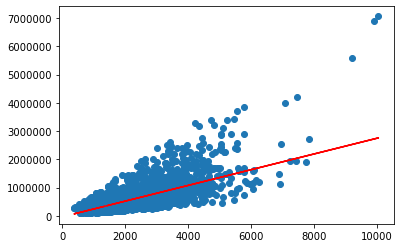

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

x = df.iloc[:, 5].values.reshape(-1,1)
y = df.iloc[:, 2].values

regressor_linear = LinearRegression()
dataset = dataset_split(x, y)
regressor_linear.fit(dataset[0], dataset[2])

plt.scatter(dataset[1], dataset[3])
plt.plot(dataset[1], regressor_linear.predict(dataset[1]), color = 'red')

linear_simples_score = regressor_linear.score(dataset[1], dataset[3])
linear_simples_error = mean_absolute_error(dataset[3], regressor_linear.predict(dataset[1]))
#print('Erro quadrático:',mean_squared_error(dataset[3], regressor_linear.predict(dataset[1])))

## Regressão Linear Múltipla

In [4]:
from sklearn.linear_model import LinearRegression

x = df.iloc[:, 3:19].values
y = df.iloc[:, 2].values

regressor_linear = LinearRegression()
dataset = dataset_split(x, y)
regressor_linear.fit(dataset[0], dataset[2])

linear_multipla_score = regressor_linear.score(dataset[1], dataset[3])
linear_multipla_error = mean_absolute_error(dataset[3], regressor_linear.predict(dataset[1]))

## Regressão Linear Polinomial

In [5]:
from sklearn.preprocessing import PolynomialFeatures

x = df.iloc[:, 3:19].values
y = df.iloc[:, 2].values
poly = PolynomialFeatures(degree = 2)
dataset = dataset_split(x, y)
dataset[0], dataset[1] = poly.fit_transform(dataset[0]), poly.fit_transform(dataset[1])

regressor_polinomial = LinearRegression()
regressor_polinomial.fit(dataset[0], dataset[2])

linear_polinomial_score = regressor_polinomial.score(dataset[1], dataset[3])
linear_polinomial_error = mean_absolute_error(dataset[3], regressor_polinomial.predict(dataset[1]))

## Árvore de Decisão

In [6]:
x = df.iloc[:, 3:19].values
y = df.iloc[:, 2].values
dataset = dataset_split(x, y)

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(dataset[0], dataset[2])

decision_tree_score = decision_tree.score(dataset[1], dataset[3])
decision_tree_error = mean_absolute_error(dataset[3], decision_tree.predict(dataset[1]))

## Random Forest

In [7]:
x = df.iloc[:, 3:19].values
y = df.iloc[:, 2].values
dataset = dataset_split(x, y)

from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 100)
random_forest.fit(dataset[0], dataset[2])

random_forest_score = random_forest.score(dataset[1], dataset[3])
random_forest_error = mean_absolute_error(dataset[3], random_forest.predict(dataset[1]))

## SVR

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(df.iloc[:, 3:19].values)
y = scaler.fit_transform(df.iloc[:, 2:3].values)

dataset = dataset_split(x, y)

from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', C = 2.0)
svr.fit(dataset[0], dataset[2])

svr_score = svr.score(dataset[1], dataset[3])
svr_error = mean_absolute_error(scaler.inverse_transform(dataset[3]), scaler.inverse_transform(svr.predict(dataset[1])))

/home/lindino/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Redes Neurais

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(df.iloc[:, 3:19].values)
y = scaler.fit_transform(df.iloc[:, 2:3].values)

dataset = dataset_split(x, y)

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes = (9,9))
mlp.fit(dataset[0],dataset[2])

rede_neural_score = mlp.score(dataset[1], dataset[3])
rede_neural_error = mean_absolute_error(scaler.inverse_transform(dataset[3]), scaler.inverse_transform(mlp.predict(dataset[1])))

/home/lindino/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Resultados

In [12]:
GREEN = "\033[1;32m" 
RESET = '\033[0;0m'
NEGRITO = '\033[1m'
scores = {'Simples': linear_simples_score,'Múltipla': linear_multipla_score, 'Polinomial': linear_polinomial_score,
          'Decision Tree': decision_tree_score, 'Random Forest': random_forest_score, 'SVR': svr_score, 
          'Rede Neural': rede_neural_score}
errors = {'Simples': linear_simples_error,'Múltipla': linear_multipla_error, 'Polinomial': linear_polinomial_error,
          'Decision Tree': decision_tree_error, 'Random Forest': random_forest_error,'SVR': svr_error, 
          'Rede Neural': rede_neural_error}

for model in scores:
    if model == 'SVR':
        print('{}{}{} \t\t-> {}\tAcurácia:{} {:.1f}%{}{} \tErro:{} {:.2f}{}'.format(NEGRITO,model,RESET,NEGRITO,GREEN,(scores[model] * 100), RESET,NEGRITO,GREEN,errors[model],RESET))
    else:
        print('{}{}{} \t-> {}\tAcurácia:{} {:.1f}%{}{} \tErro:{} {:.2f}{}'.format(NEGRITO,model,RESET,NEGRITO,GREEN,(scores[model] * 100), RESET,NEGRITO,GREEN,errors[model],RESET))

Simples 	-> 	Acurácia: 48.9% 	Erro: 172604.13
Múltipla 	-> 	Acurácia: 68.9% 	Erro: 123888.44
Polinomial 	-> 	Acurácia: 81.5% 	Erro: 101228.21
Decision Tree 	-> 	Acurácia: 73.7% 	Erro: 99853.28
Random Forest 	-> 	Acurácia: 88.4% 	Erro: 67451.64
SVR 		-> 	Acurácia: 75.5% 	Erro: 81089.72
Rede Neural 	-> 	Acurácia: 88.6% 	Erro: 72487.98
